<a href="https://colab.research.google.com/github/himsingh24/Data-analysis/blob/main/Data%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Analysis

In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "whitegrid", color_codes = True)
np.random.seed(sum(map(ord, "palettes")))

from sklearn.metrics import roc_auc_score

#Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,train_test_split




In [ ]:
train=pd.read_csv("train.csv")

In [ ]:
test=pd.read_csv("train.csv")
train_test_data = [train, test] 

In [ ]:
for dataset in train_test_data:    
    dataset.loc[dataset['Age'] <= 10, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <= 20), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 30), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 40), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 50), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 50) & (dataset['Age'] <= 60), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 60) & (dataset['Age'] <= 70), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 70, 'Age'] = 7

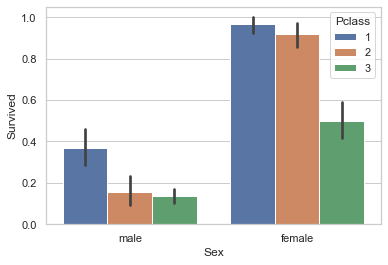

In [ ]:
fig = sns.barplot(x="Sex", y="Survived", hue="Pclass", data=train)

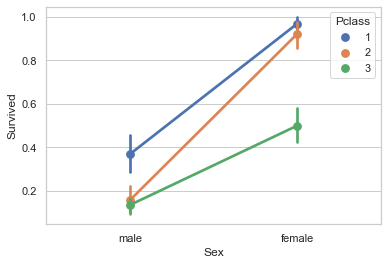

In [ ]:
fig = sns.pointplot(x="Sex", y="Survived", hue="Pclass", data=train);



In [ ]:
# ML algorithms 
#Data Retriving and Exploration

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,2.424370,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,1.458359,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,1.250000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,2.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,3.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,7.000000,8.000000,6.000000,512.329200


In [ ]:
#For the train data, the numerical features are PassengerId, pclass, Age, sibSp, Parch, and Fare.

In [ ]:
test.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,2.424370,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,1.458359,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,1.250000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,2.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,3.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,7.000000,8.000000,6.000000,512.329200


In [ ]:
#The test data has same numerical features: PassengerId, pclass, Age, sibSp, Parch, and Fare.

#df.info() help us to see how many instances does the datasethave and the overall missing data

In [ ]:
train.info()
print("++++++++++++++++++++++++++++++++++++++")
print()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
++++++++++++++++++++++++++++++++++++++

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerI

In [ ]:
#The train data has 891 instances (rows) and Age, Cabin, Embarked have missing data. The test data has 418 instances (rows) and Age, Fare, and Cabin have missing data

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Information about the categorical variables

In [ ]:
train.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dorking, Mr. Edward Arthur",male,1601,G6,S
freq,1,577,7,4,644


In [ ]:
test.describe(include = ['O'])

,Sex,Ticket,Cabin,Embarked
count,891,891,204,889
unique,2,681,147,3
top,male,1601,G6,S
freq,577,7,4,644


In [ ]:
train.drop(['Name'], axis = 1, inplace = True)
test.drop(['Name'], axis=1, inplace = True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,2.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,3.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,3.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,3.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:title={'center':'Correlation between Features'}>

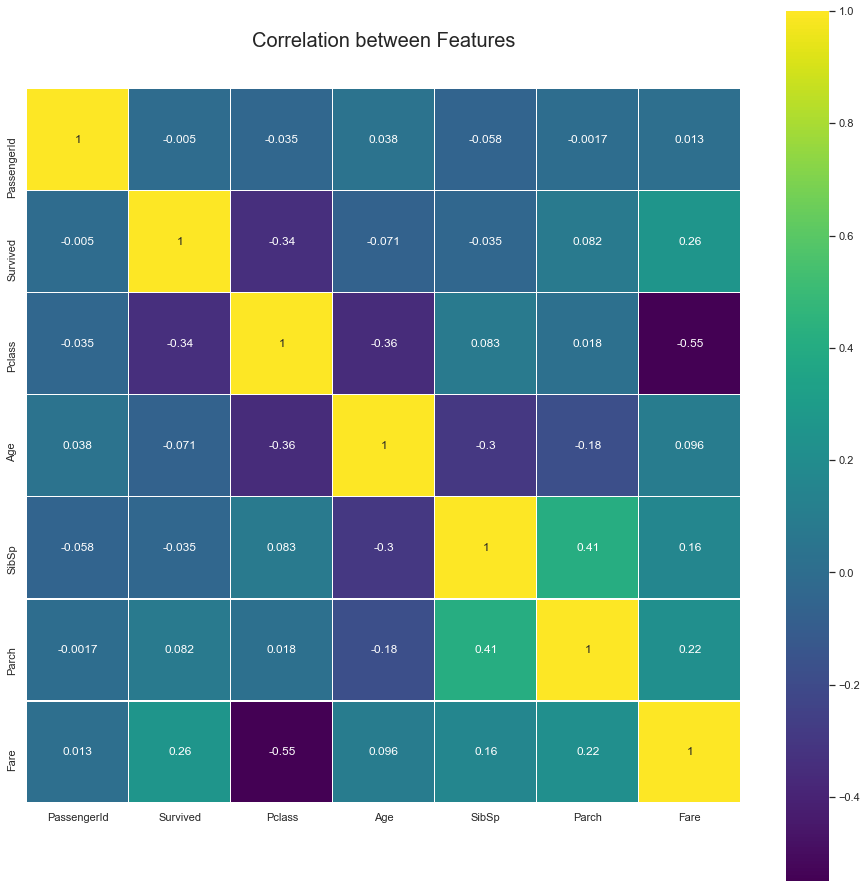

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(16,16))
plt.title('Correlation between Features', y=1.05, size = 20)
sns.heatmap(train.corr(),
            linewidths=0.1, 
            vmax=1.0, 
            square=True, 
            cmap=colormap, 
            linecolor='white', 
            annot=True)